# Tendência

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Time Series Studies/CONSUMO.XLS')

In [6]:
 # O Argumento center igual a True faz com que o valor central seja a referencia para o cálculo da média
df['media_movel_3'] = df['consumo'].rolling(window = 3, center = True).mean()
df['media_movel_5'] = df['consumo'].rolling(window = 5, center = True).mean()

In [7]:
df['residuos_3'] = df['consumo'] - df['media_movel_3']
df['residuos_5'] = df['consumo'] - df['media_movel_5']

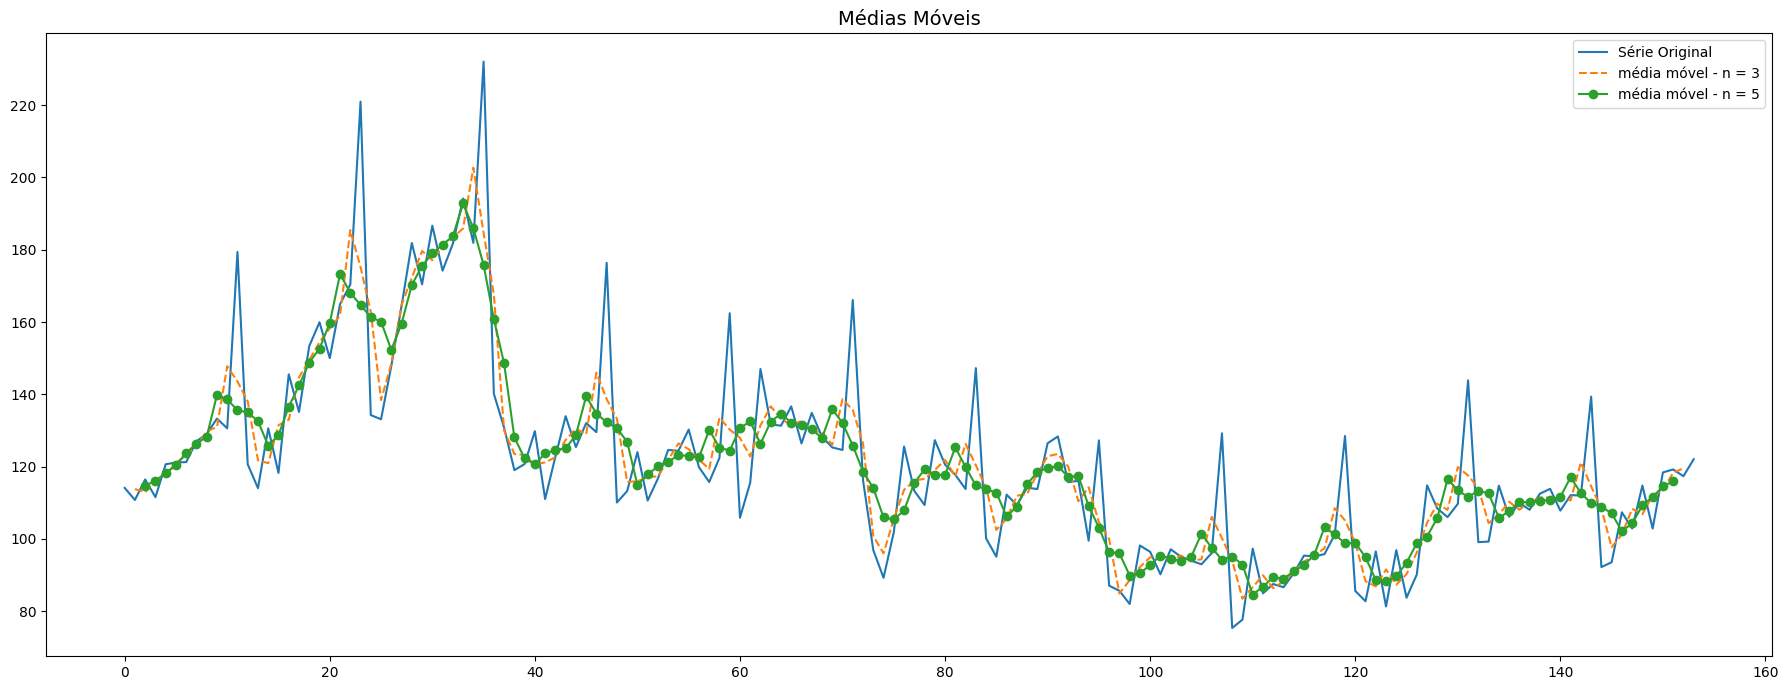

In [8]:
plt.figure(figsize = (18,7))

plt.plot(df.index, df['consumo'], label = 'Série Original')
plt.plot(df.index, df['media_movel_3'], linestyle = 'dashed', label = 'média móvel - n = 3')
plt.plot(df.index, df['media_movel_5'], marker = 'o', label = 'média móvel - n = 5')
plt.title('Médias Móveis', fontdict={'size':14})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

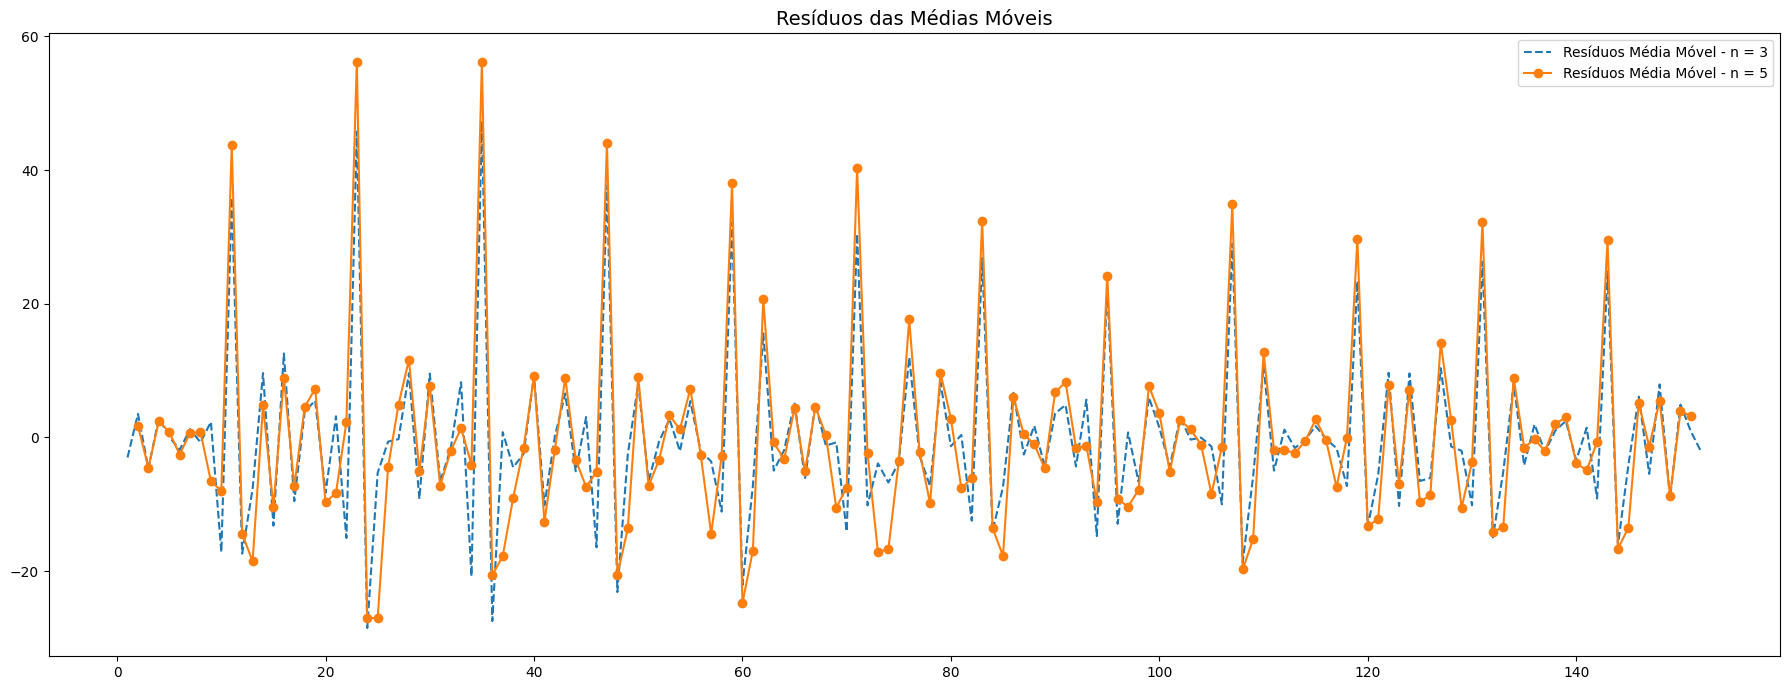

In [9]:
plt.figure(figsize = (18,7))

plt.plot(df.index, df['residuos_3'], linestyle = 'dashed', label = 'Resíduos Média Móvel - n = 3')
plt.plot(df.index, df['residuos_5'], marker = 'o', label = 'Resíduos Média Móvel - n = 5')
plt.title('Resíduos das Médias Móveis', fontdict={'size':14})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# Sazonalidade

<Axes: >

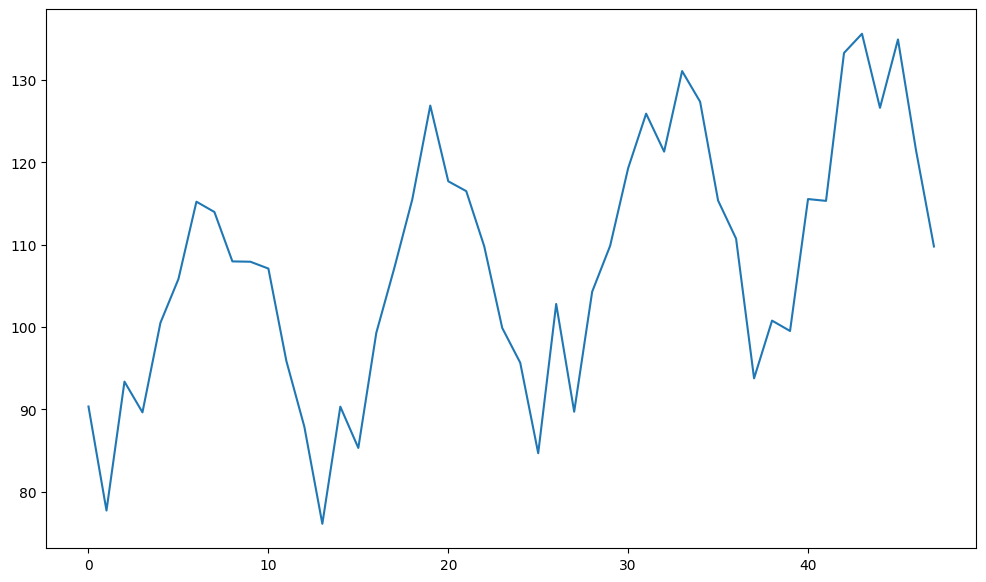

In [10]:
df = pd.read_excel('/content/drive/MyDrive/Time Series Studies/IPI.XLS')
df['mes/ano'] = pd.to_datetime(df['mês/ano'])

df['mes'] = df['mes/ano'].dt.month

data_inicial = pd.to_datetime('1993-01-01')
data_final = pd.to_datetime('1996-12-31')

df2 = df[(df['mês/ano'] >= data_inicial) & (df['mês/ano'] <= data_final)].reset_index(drop='True')

plt.figure(figsize = (12,7))
df2['ipialiment'].plot()

## Estimativa da Tendencia com médias Móveis

In [11]:
df2['tend_moving_average'] = df2['ipialiment'].rolling(window=13, center=True).mean()

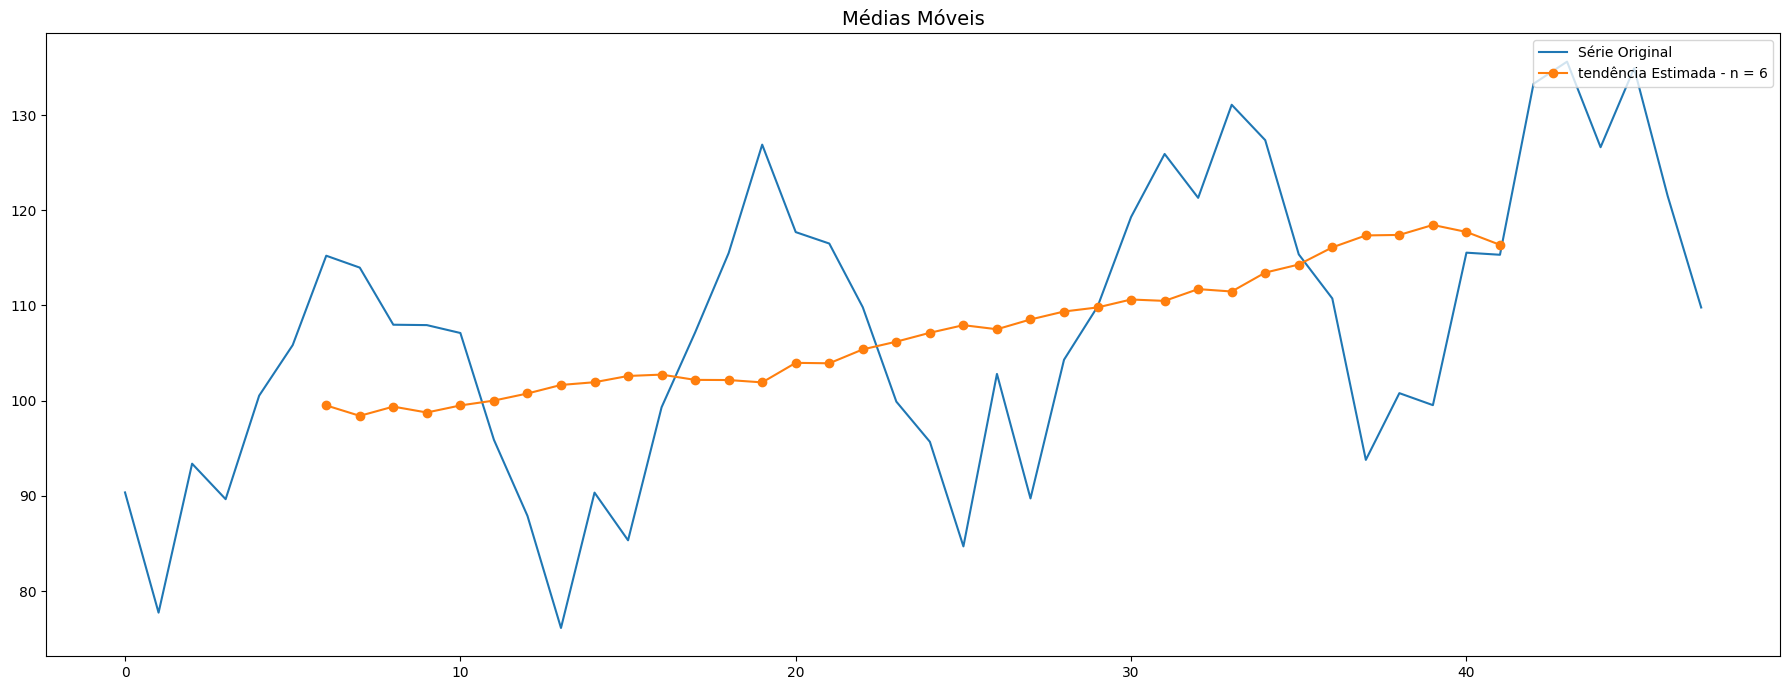

In [12]:
plt.figure(figsize = (18,7))

plt.plot(df2.index, df2['ipialiment'], label = 'Série Original')
plt.plot(df2.index, df2['tend_moving_average'], marker = 'o', label = 'tendência Estimada - n = 6')
plt.title('Médias Móveis', fontdict={'size':14})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

## Removendo a Tendência da Série

In [13]:
df2['serie_no_tend'] = df2['ipialiment'] - df2['tend_moving_average']

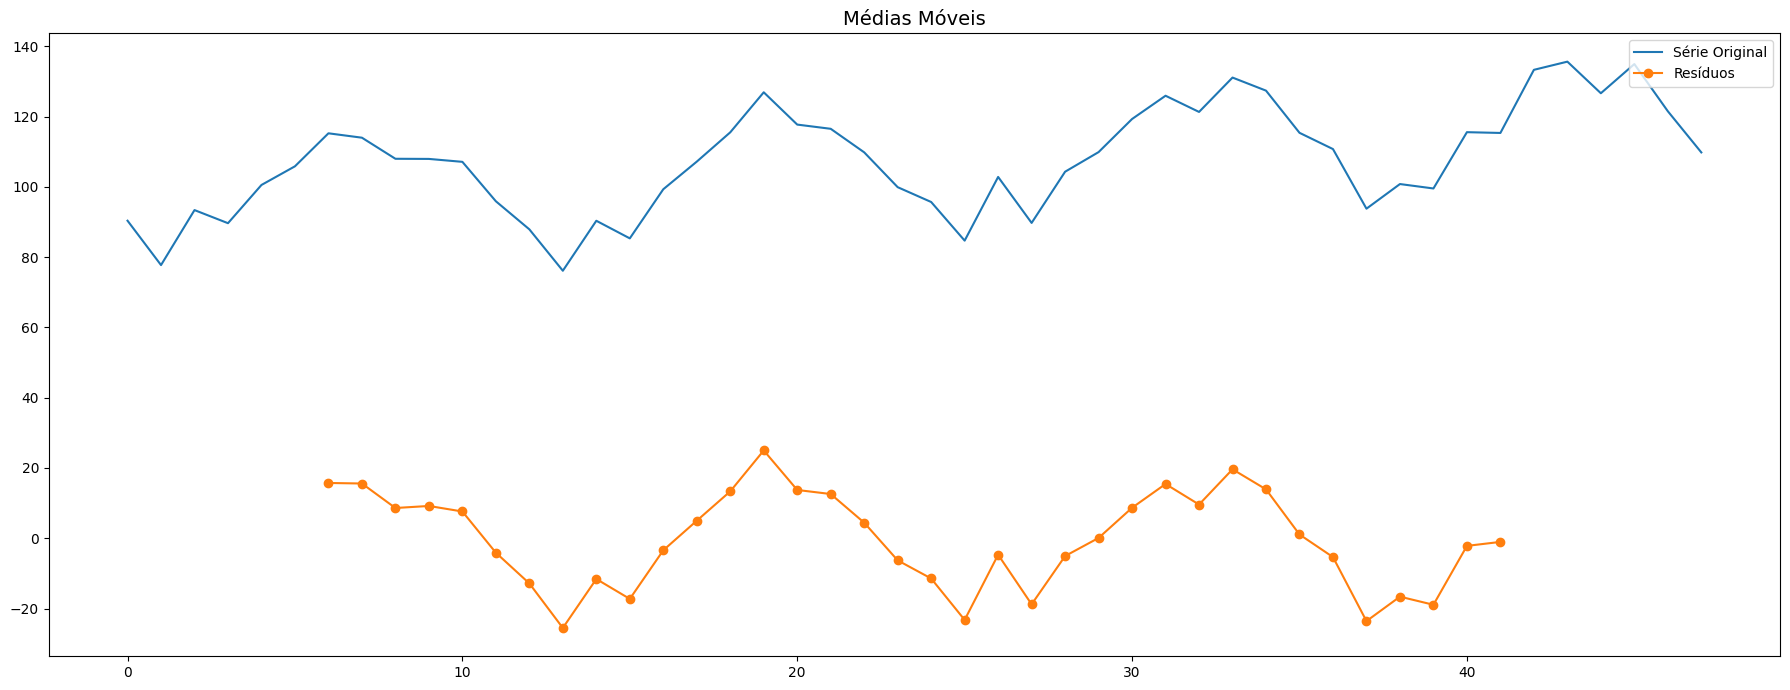

In [14]:
plt.figure(figsize = (18,7))

plt.plot(df2.index, df2['ipialiment'], label = 'Série Original')
plt.plot(df2.index, df2['serie_no_tend'], marker = 'o', label = 'Resíduos')
plt.title('Médias Móveis', fontdict={'size':14})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

## Estimativa da Sazonalidade - Modelagem dos Resíduos

### Média por Mês

In [15]:
df2['month_average'] = df2.groupby('mes')['serie_no_tend'].transform('mean')

### Média Total dos Meses

In [16]:
df2['total_month_average'] = df2['serie_no_tend'].mean()

## Estimativa das Constantes Sazonais

In [17]:
df2['sazo_const'] = df2['month_average'] - df2['total_month_average']

In [18]:
aux = df2.groupby('mes')['sazo_const'].mean()

<ipython-input-19-a526a2155f75>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


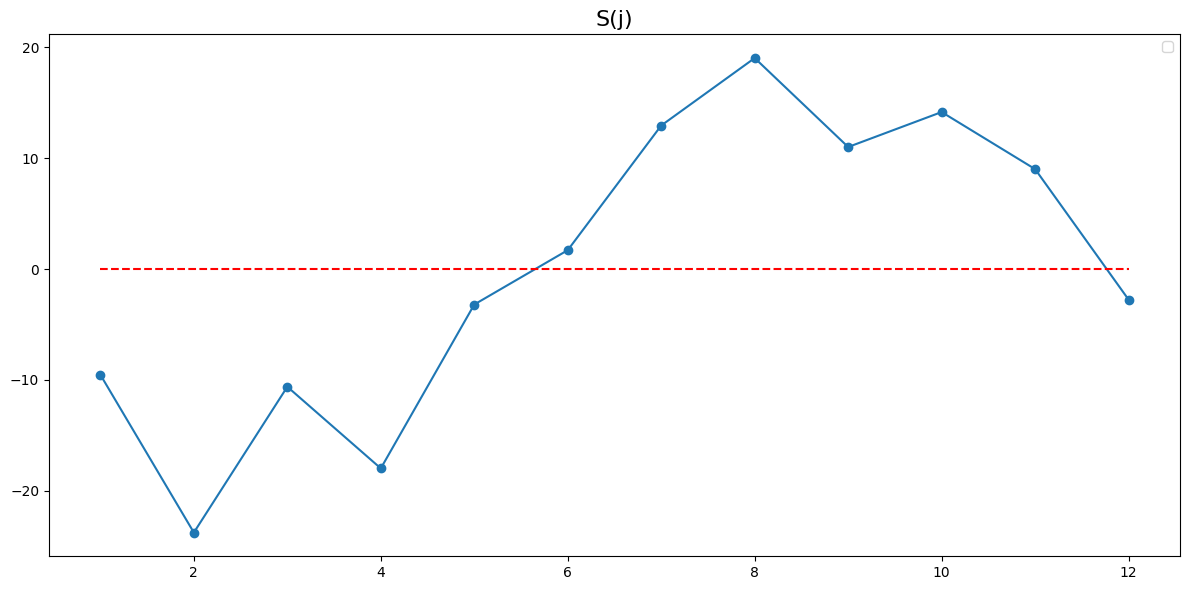

In [19]:
plt.figure(figsize = (12,6))

plt.plot(aux.index, aux, marker = 'o')
plt.hlines(y = 0, xmin = 1, xmax = 12, color = 'red', linestyle = 'dashed')

plt.title('S(j)', fontdict={'size':16})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

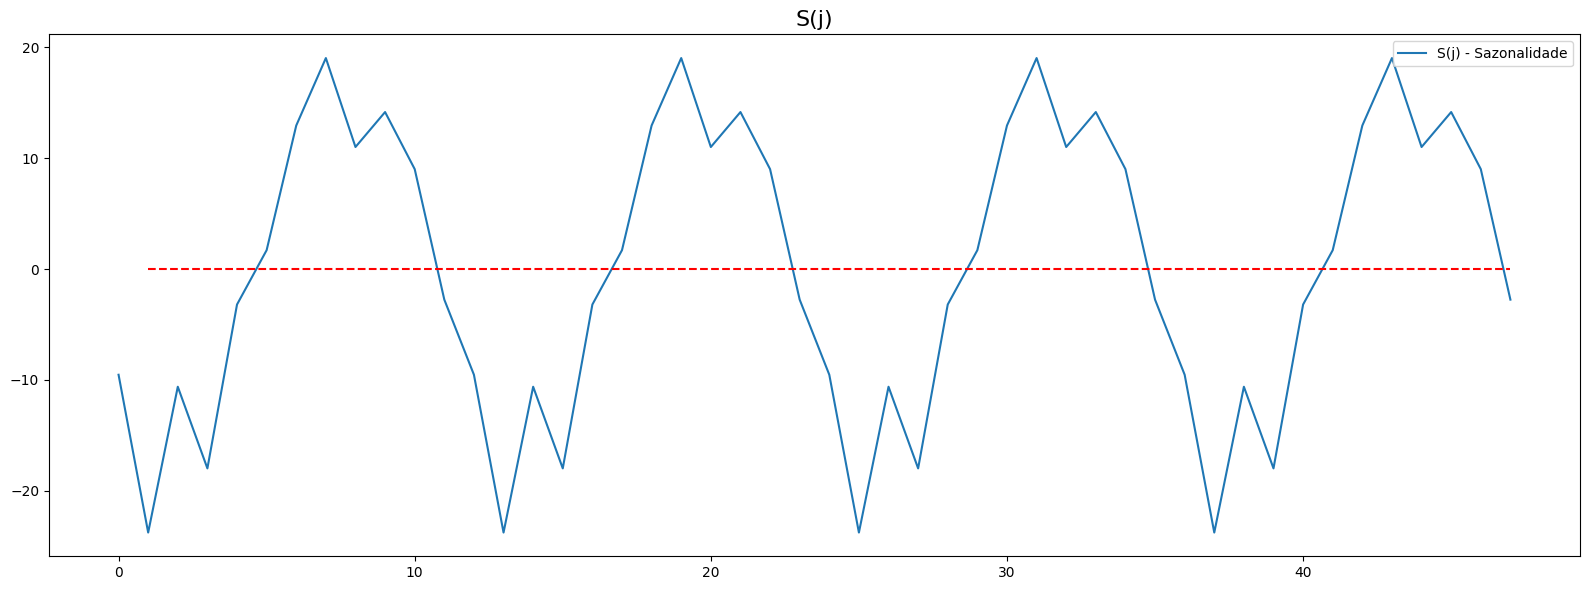

In [20]:
plt.figure(figsize = (16,6))

plt.plot(df2.index, df2['sazo_const'], label = 'S(j) - Sazonalidade')
plt.hlines(y = 0, xmin = 1, xmax = df2.index[-1], color = 'red', linestyle = 'dashed')

plt.title('S(j)', fontdict={'size':16})

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [21]:
df2['serie_no_sazo'] = df2['ipialiment'] - df2['sazo_const']

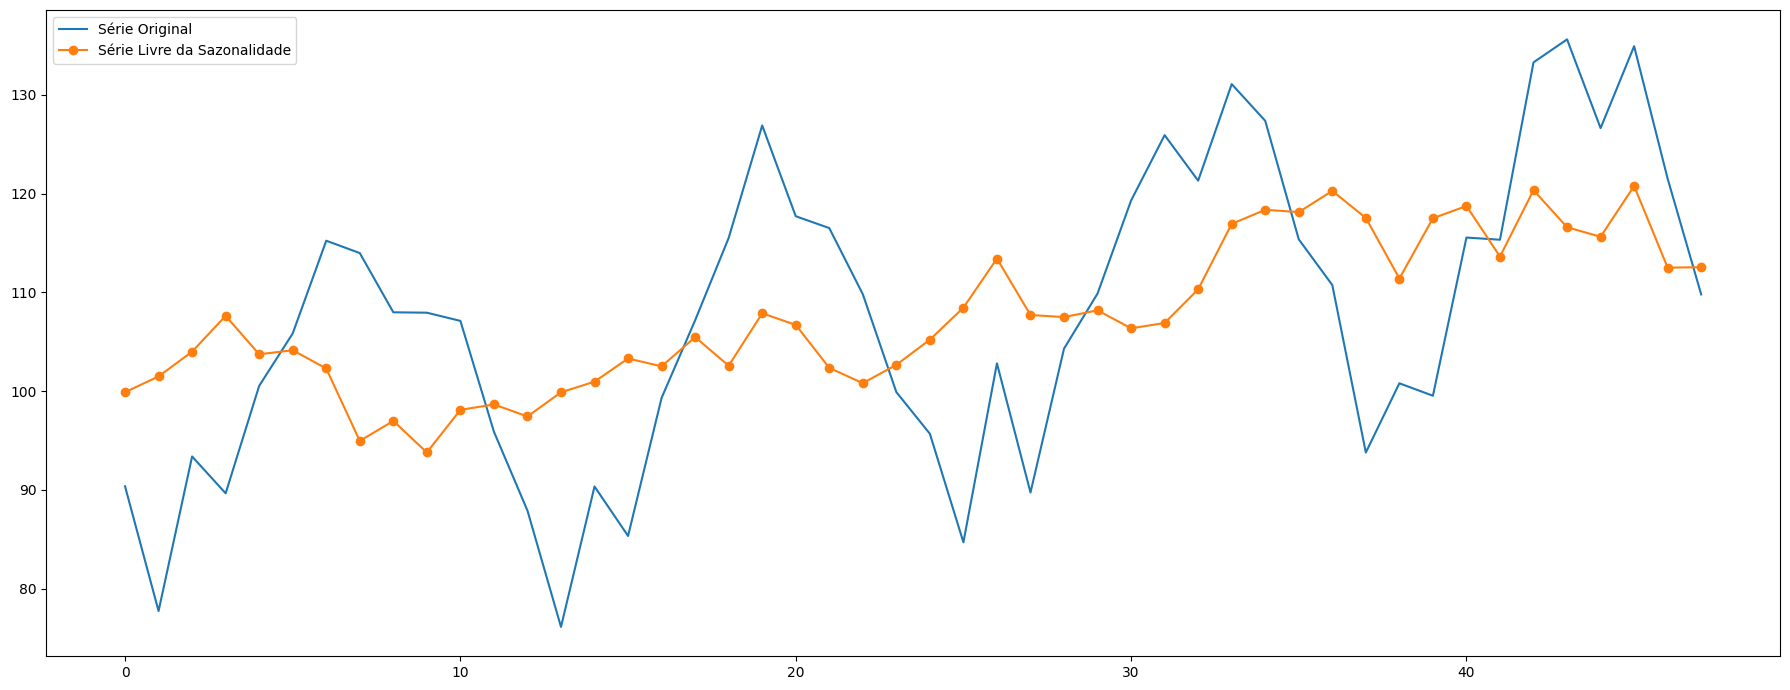

In [22]:
plt.figure(figsize = (18,7))

plt.plot(df2.index, df2['ipialiment'], label = 'Série Original')
plt.plot(df2.index, df2['serie_no_sazo'], marker = 'o', label = 'Série Livre da Sazonalidade')

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [23]:
df2.head(20)

,mês/ano,ipialiment,mes/ano,mes,tend_moving_average,serie_no_tend,month_average,total_month_average,sazo_const,serie_no_sazo
0,1993-01-01,90.36,1993-01-01,1,NaN,NaN,-9.891026,-0.360171,-9.530855,99.890855
1,1993-02-01,77.73,1993-02-01,2,NaN,NaN,-24.118974,-0.360171,-23.758803,101.488803
2,1993-03-01,93.38,1993-03-01,3,NaN,NaN,-10.972821,-0.360171,-10.612650,103.992650
3,1993-04-01,89.65,1993-04-01,4,NaN,NaN,-18.333846,-0.360171,-17.973675,107.623675
4,1993-05-01,100.53,1993-05-01,5,NaN,NaN,-3.557949,-0.360171,-3.197778,103.727778
5,1993-06-01,105.84,1993-06-01,6,NaN,NaN,1.341795,-0.360171,1.701966,104.138034
6,1993-07-01,115.23,1993-07-01,7,99.501538,15.728462,12.580000,-0.360171,12.940171,102.289829
7,1993-08-01,113.98,1993-08-01,8,98.406154,15.573846,18.662821,-0.360171,19.022991,94.957009
8,1993-09-01,107.98,1993-09-01,9,99.376154,8.603846,10.642308,-0.360171,11.002479,96.977521
9,1993-10-01,107.94,1993-10-01,10,98.756923,9.183077,13.795128,-0.360171,14.155299,93.784701
